# NbO2 I-V Curves

March 22 2022

Re-used the Mag Multipole code to try and make graphs of the I-V Curves for the NbO2 project.

In [3]:
# prepares the notebook for "inline" graphing, and imports matplotlib library
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Making the first graphs
basePath = r'C:\Users\Ted Mburu\NbO2'
fileName = r'IVNb0p95Ti0p05O2_24-05162022-05.txt'

def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

NbPercentage = str(int(find_between(fileName, "IVNb", "Ti").split('p')[1]) / 100)
TiPercentage = str(int(find_between(fileName, "Ti", "O2").split('p')[1]) / 100)
sampleNumber = find_between(fileName, "-", ".txt").split('-')[1]


filePath = ''
if (NbPercentage  == "0.95"):
    filePath = basePath + r'\Doping05\ '.rstrip() + fileName
elif (NbPercentage  == "0.90"):
    filePath = basePath + r'\Doping10\ '.rstrip() + fileName
else: 
    filePath = basePath + r'\Doping0\ '.rstrip() + fileName
    
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
#df5 = pd.read_csv(r'e:\Google Drive\RawData\IVNb0p100Ti0p00O2_02-04262022-16.txt', names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data=df5.values
df5.head()

t= data[:,0]
I= data[:,1]
V= data[:,2]


slopes = np.absolute(np.divide(V, I))
derivative = np.gradient(slopes)
secondDerivative = np.gradient(derivative)
print(derivative)
np.gradient(secondDerivative)


largestCurrent = np.amax(I)
maxCurrentThreshhold = largestCurrent * 0.99;
indexOfFirstLargeCurrent = np.argmax(I > maxCurrentThreshhold)
print("max current starts at: " + str(indexOfFirstLargeCurrent))

reversedCurrentArray = I[::-1]
reversedSlopeArray = slopes[::-1]

index = np.size(I) - indexOfFirstLargeCurrent 
previousSlope = slopes[index - 1]

while index >= 0 :
    if np.abs(previousSlope - reversedSlopeArray[index]) > previousSlope * 0.1:
        print("index of the beginning of the jump: " + str(index))
        finalIndex = index
        index = 0
    previousSlope = reversedSlopeArray[index]
    index -= 1


plt.rcParams['figure.figsize'] = (11,6)
plt.figure(0)
plt.grid()
plt.semilogy(V,I)
# plt.plot(V[finalIndex],I[finalIndex],'ro') 
plt.xlabel('Voltage (V)');
plt.ylabel('Current (A)');

nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
sample = ' sample ' + sampleNumber

title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
plt.title(title);


I0_d=I
V0_d=V

: 

The average resistance is 37.4 kiloohms
The standard deviation is 0.2 kiloohms
The average resistance is 7.6 kiloohms
The standard deviation is 3.1 kiloohms


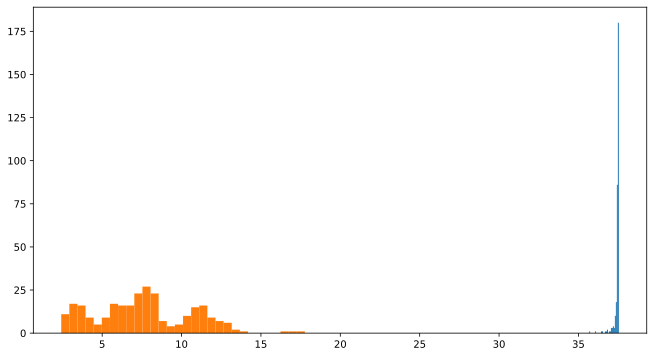

In [3]:
absoluteValueVoltage = np.abs(V)
R = absoluteValueVoltage / I
Vset  = 0.5
Vdist = 0.1

Rcut = R[(absoluteValueVoltage > (Vset-Vdist) ) & (absoluteValueVoltage < (Vset+Vdist) )]/1e3
#print(Rcut)

Rth = 20
Rcut2 = Rcut[Rcut>Rth]
plt.hist(Rcut2,bins=30)
#plt.xlim([0,5])

print('The average resistance is', "{:.1f}".format(np.mean(Rcut2)), 'kiloohms'  ) 
print('The standard deviation is', "{:.1f}".format(np.std(Rcut2)), 'kiloohms'  ) 


Rth = 20
Rcut2 = Rcut[Rcut<Rth]
plt.hist(Rcut2,bins=30)

print('The average resistance is', "{:.1f}".format(np.mean(Rcut2)), 'kiloohms'  ) 
print('The standard deviation is', "{:.1f}".format(np.std(Rcut2)), 'kiloohms'  ) 



[2.0533 1.1   ]


(0.0, 3000.0)

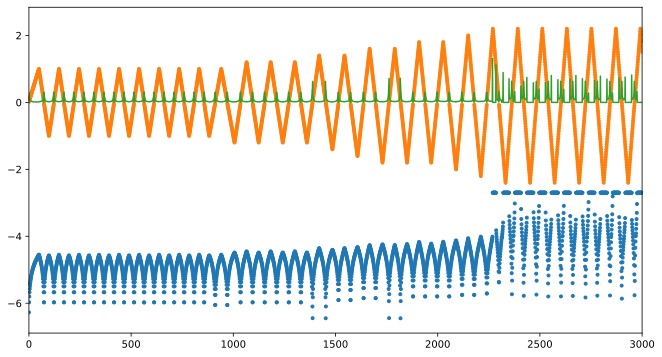

In [4]:
Icut = np.log10(I[I>1e-7])
Vcut3 = V[I>1e-7]

diff = np.abs(Icut[1:]-Icut[:-1])
diff = np.append(diff,0)


plt.plot(Icut[:-1],'.')
plt.plot(Vcut3[:-1],'.')
plt.plot(diff)
print(Vcut3[diff>1])

plt.xlim([0,3000])


# orange - voltage

# green - diff of log of current 

# blue - log of current 

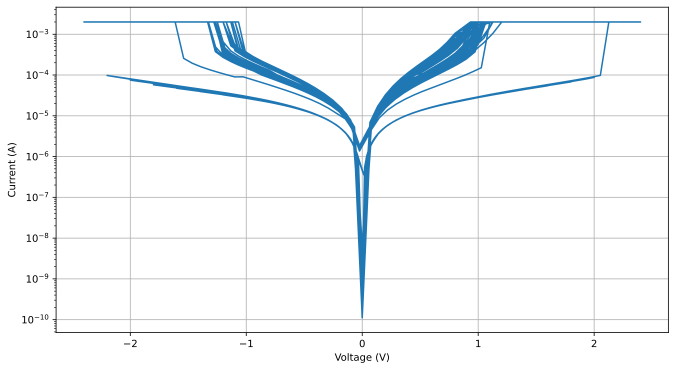

In [5]:
# Making the first graphs

#df5 = pd.read_csv(r'e:\Google Drive\Data\NbO2\Doping0\IVcurveNbO2_updoped-01042022-12.txt', names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data=df5.values
df5.head()

t= data[:,0]
I= data[:,1]
V= data[:,2]


plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
plt.figure(0)
plt.grid()
plt.semilogy(V,I)
#plt.xlim([60,80])
#plt.ylim([0,125])
plt.xlabel('Voltage (V)');
plt.ylabel('Current (A)');
#plt.title(r'NbO$_2$, 2$\times$2 $\mu$m$^2$, sample 12');


I0_b=I
V0_b=V

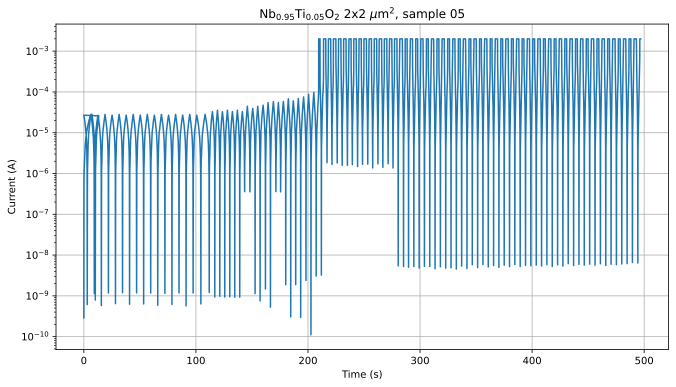

In [6]:
plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
plt.figure(0)
plt.grid()
plt.semilogy(t,I)
#plt.xlim([-0.75,-0.7])
#plt.ylim([0,125])
plt.xlabel('Time (s)');
plt.ylabel('Current (A)');

nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
sample = ' sample ' + sampleNumber

title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
plt.title(title);

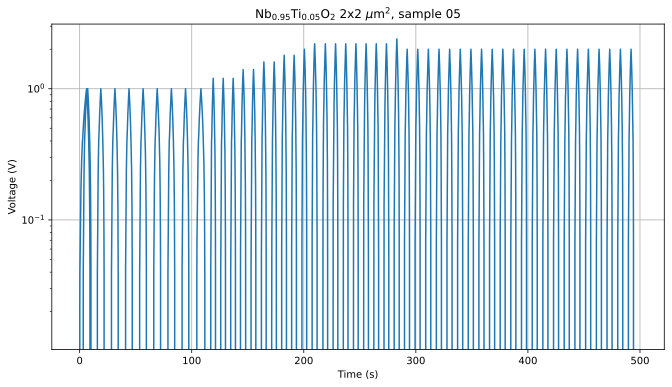

In [7]:
plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
plt.figure(0)
plt.grid()
plt.semilogy(t,V)
#plt.xlim([-0.75,-0.7])
#plt.ylim([0,125])
plt.xlabel('Time (s)');
plt.ylabel('Voltage (V)');

nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
sample = ' sample ' + sampleNumber

title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
plt.title(title);

In [1]:
# # Making the first graphs

# #df5 = pd.read_csv(r'e:\Google Drive\Data\NbO2\Doping0\IVcurveNbO2_updoped-01042022-12.txt', names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
# df5 = pd.read_csv(r'e:\Google Drive\RawData\IVNb0p100Ti0p00O2_02-04262022-07a.txt', names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
# data=df5.values
# df5.head()

# t= data[:,0]
# I= data[:,1]
# V= data[:,2]

# plt.rcParams['figure.figsize'] = (11,6)
# #plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
# plt.figure(0)
# plt.grid()
# plt.semilogy(V,I)
# #plt.xlim([60,80])
# #plt.ylim([0,125])
# plt.xlabel('Voltage (V)');
# plt.ylabel('Current (A)');
# #plt.title(r'NbO$_2$, 2$\times$2 $\mu$m$^2$, sample 12');


# I0_c=I
# V0_c=V

In [2]:
# plt.semilogy(V0_b, I0_b, V0_c, I0_c,V0_d, I0_d)

NameError: name 'plt' is not defined

In [3]:
# plt.semilogy(V0_c, I0_c,V0_d, I0_d)

In [4]:
# Making the first graphs
basePath = r'C:\Users\Ted Mburu\NbO2'
fileName = r'IVNb0p95Ti0p05O2_24-05162022-05.txt'

posThreshValues = []
negThreshValues = []

posHoldValues = []
negHoldValues = []

def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""
    
def isIncreasing(L):
    return L[0] < L[len(L) - 1]

def isDecreasing(L):
    return L[0] > L[len(L) - 1]

def non_increasing(L):
    return all(x>=y for x, y in zip(L, L[1:]))

def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))

def monotonic(L):
    return non_increasing(L) or non_decreasing(L)

def sortIntoSide(voltage, current, array):
    if isIncreasing(voltage) and isIncreasing(current):
        print("0 to + is thresh")
        posThreshValues.append(array)
    elif isDecreasing(voltage) and isDecreasing(current):
        print("+ to 0 is hold")
        posHoldValues.append(array)
    elif isDecreasing(voltage) and isIncreasing(current):
        print("0 to - thresh on neg")
        negThreshValues.append(array)
    elif isIncreasing(voltage) and isDecreasing(current):
        print("- to 0 hold on neg")
        negHoldValues.append(array)
    else: 
        print("???")
        
        
# zeroToPositive = []
# positiveToZero = []

# zeroToNegative = []
# negativeToZero = []

# find max change in derivative
# 0 to + is thresh
# + to 0 is hold 

# 0 to - thresh on neg
# - to 0 hold on neg

# zeroToPositive = [0]
# positiveToZero = [0]

# zeroToNegative = [0]
# negativeToZero = [0]

# def upOrDown(array):
#     if

NbPercentage = str(int(find_between(fileName, "IVNb", "Ti").split('p')[1]) / 100)
TiPercentage = str(int(find_between(fileName, "Ti", "O2").split('p')[1]) / 100)
sampleNumber = find_between(fileName, "-", ".txt").split('-')[1]

filePath = ''
if (NbPercentage  == "0.95"):
    filePath = basePath + r'\Doping05\ '.rstrip() + fileName
elif (NbPercentage  == "0.90"):
    filePath = basePath + r'\Doping10\ '.rstrip() + fileName
else: 
    filePath = basePath + r'\Doping0\ '.rstrip() + fileName
    
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
#df5 = pd.read_csv(r'e:\Google Drive\RawData\IVNb0p100Ti0p00O2_02-04262022-16.txt', names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data=df5.values
df5.head()

t= data[:,0]
I= data[:,1]
V= data[:,2]



slopes = np.absolute(np.divide(V, I))
derivative = np.gradient(slopes)
secondDerivative = np.gradient(derivative)
# print(derivative)
# print(secondDerivative)


largestCurrent = np.amax(I)
maxCurrentThreshhold = largestCurrent * 0.95;
indexOfFirstLargeCurrent = np.argmax(I > maxCurrentThreshhold)


# print("max current starts at: " + str(indexOfFirstLargeCurrent))



reversedCurrentArray = I[::-1]
reversedSlopeArray = slopes[::-1]

index = np.size(I) - indexOfFirstLargeCurrent 
previousSlope = slopes[index - 1]

while index >= 0 :
    if np.abs(previousSlope - reversedSlopeArray[index]) > previousSlope * 0.1:
#         print("index of the beginning of the jump: " + str(index))
        finalIndex = index
        index = 0
    previousSlope = reversedSlopeArray[index]
    index -= 1

# V = V[indexOfFirstLargeCurrent:]
# I = I[indexOfFirstLargeCurrent:]
# t = t[indexOfFirstLargeCurrent:]


plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
plt.figure(0)
plt.grid()
plt.semilogy(V,I)
# plt.plot(V[indexOfFirstLargeCurrent],I[indexOfFirstLargeCurrent],'ro') 
#plt.xlim([-0.75,-0.7])
#plt.ylim([0,125])
plt.xlabel('Voltage (V)');
plt.ylabel('Current (A)');

nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
sample = ' sample ' + sampleNumber

title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
plt.title(title);

I0_d=I
V0_d=V

V = V[indexOfFirstLargeCurrent:].tolist()
I = I[indexOfFirstLargeCurrent:].tolist()
t = t[indexOfFirstLargeCurrent:].tolist()

smallestCurrentAfterBurnThrough = min(I[indexOfFirstLargeCurrent:]);
# print(smallestCurrentAfterBurnThrough)
indexOfSmallestCurrentAfterBurnThrough = I.index(smallestCurrentAfterBurnThrough)
# print("index of smallest current: " + str(indexOfSmallestCurrentAfterBurnThrough))

# lst = [8,6,9,-1,2,0]
# m = min(lst)

allZeroIndexes = [0]
zeroIndexes = []

allMaxIndexes = []
maxIndexes = []

allIndexes = []

zeroToPositive = []
positiveToZero = []

zeroToNegative = []
negativeToZero = []

for index, x in enumerate(I):
    if x < 0.00001:
        allZeroIndexes.append(index)
        
# print(allZeroIndexes)

for x in range(len(allZeroIndexes) - 1):
    if allZeroIndexes[x]+1 != allZeroIndexes[x+1]:
        zeroIndexes.append(allZeroIndexes[x])

# print("zero indexes")
# print(zeroIndexes)
# print(len(zeroIndexes))

for index, x in enumerate(I):
    if x > maxCurrentThreshhold:
        allMaxIndexes.append(index)
        
# print(allMaxIndexes)

for x in range(len(allMaxIndexes) - 1):
    if allMaxIndexes[x]+1 != allMaxIndexes[x+1]:
        maxIndexes.append(allMaxIndexes[x])

# print("max indexes")
# print(maxIndexes)
# print(len(maxIndexes))

# for x in range(len(zeroIndexes) - 1):
#     if zeroIndexes[x]:
#         zeroIndexes.append(allZeroIndexes[x])


allIndexes = [*zeroIndexes, *maxIndexes]
# print("all indexes")
# print(allIndexes)
# print(len(allIndexes))

allIndexes = sorted(allIndexes)
# print("sorted indexes")
# print(allIndexes)
# print(len(allIndexes))

    
# print()

# for x in range(len(maxIndexes) - 1):
#     plt.plot(V[maxIndexes[x]],I[maxIndexes[x]],'ro') 
    
# for x in range(len(zeroIndexes) - 1):
#     plt.plot(V[zeroIndexes[x]],I[zeroIndexes[x]],'bo') 
    
rangeOfIndexes = []
# for x in range(len(zeroIndexes) - 1):
timesToLoop = len(zeroIndexes) - 1
for x in range(0,timesToLoop,2):
    valuesBetweenIndexes = []
    voltages = []
    currents = []
#     print(V[allIndexes[x]], ", ", I[allIndexes[x]])
#     print(V[allIndexes[x+1]], ", ", I[allIndexes[x+1]])
#     print("////////////////// ")
    a = allIndexes[x]
    b = len(allIndexes) - x
    yMin = allIndexes[x]
    yMax = len(allIndexes) - x
#     yMin = a if a < b else b
#     yMax = a if a > b else b
#     print("ymin, ymax", yMin, yMax)
    for y in range(yMin, yMax):
#         print("ymin, ymax", yMin, yMax)
#         print("indexes ",allIndexes[x], allIndexes[x + 1])
#         print("values ",V[allIndexes[y]], I[allIndexes[y]], t[allIndexes[y]])
#         print("x,y ", x, y)
#         print("array length ", len(allIndexes))
#         print()
#         print()
#         print(len(allIndexes),len(allIndexes))
        valuesBetweenIndexes.append([V[allIndexes[y]], I[allIndexes[y]]])
        voltages.append(V[allIndexes[y]])
        currents.append(I[allIndexes[y]])
    if len(valuesBetweenIndexes) > 0:
#         print(valuesBetweenIndexes)
#         print(valuesBetweenIndexes[0])
#         print(valuesBetweenIndexes[len(valuesBetweenIndexes) - 1])
    #         print(y)
        sortIntoSide(voltages, currents, valuesBetweenIndexes)
#     print("*************** ")
#     print()
#     print()

        
# print(t)
# print()
# print()
# print("posThreshValues ", posThreshValues) 
# print()
# print()
# print("negThreshValues ", negThreshValues) 
# print()
# print()
# print("posHoldValues ", posHoldValues) 
# print()
# print()
# print("negHoldValues ", negHoldValues) 
# print()
# print()




indexToPlot = 2
plt.plot(V[allIndexes[indexToPlot]],I[allIndexes[indexToPlot]],'ro')
plt.plot(V[allIndexes[indexToPlot + 1]],I[allIndexes[indexToPlot + 1]],'bo')
# print(V[maxIndexes[indexToPlot]],I[maxIndexes[indexToPlot]], V[zeroIndexes[indexToPlot]],I[zeroIndexes[indexToPlot]])

posThreshValues = np.array(posThreshValues)
negThreshValues = np.array(negThreshValues)

posHoldValues = np.array(posHoldValues)
negHoldValues = np.array(negHoldValues)

voltage = posThreshValues[0][:,0]
# resistance = voltage / posThreshValues[0][:,1]
resistance = np.gradient(posThreshValues[0][:,1])
print("avg ", np.amax(np.gradient(resistance)))

voltage = negThreshValues[0][:,0]
# resistance = voltage / negThreshValues[0][:,1]
resistance = np.gradient(negThreshValues[0][:,1])
print("avg ", np.amax(np.gradient(resistance)))

voltage = posHoldValues[0][:,0]
# resistance = voltage / posHoldValues[0][:,1]
resistance = np.gradient(posHoldValues[0][:,1])
print("avg ", np.amax(np.gradient(resistance)))

# voltage = negHoldValues[0][:,0]
# resistance = voltage / negHoldValues[0][:,1]
# print("avg ", np.average(resistance))

# plt.plot(V[indexOfSmallestCurrentAfterBurnThrough],I[indexOfSmallestCurrentAfterBurnThrough],'go') 

# find max change in derivative
# 0 to + is thresh
# + to 0 is hold 

# 0 to - thresh on neg
# - to 0 hold on neg

# avg and std dev of each vector and print out the value


# take current gradient twice

NameError: name 'pd' is not defined

In [ ]:
def isIncreasing(L):
    return L[0] < L[len(L) - 1]

def isDecreasing(L):
    return L[0] > L[len(L) - 1]

def sortIntoSide(voltage, current):
    if isIncreasing(voltage) and isIncreasing(current):
        print("0 to + is thresh")
    elif isDecreasing(voltage) and isDecreasing(current):
        print("+ to 0 is hold")
    elif isDecreasing(voltage) and isIncreasing(current):
        print("0 to - thresh on neg")
    elif isIncreasing(voltage) and isDecreasing(current):
        print("- to 0 hold on neg")
    else: 
        print("???")
        
        
list1 = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
# list2 = [9,8,6,5,4,3,2,1, 0]
# list3 = [0, -1, -2, -3, -4, -5]
# list4 = [-9, -8, -3, -2, -1, 0]

# sortIntoSide(voltage, current)
print(list1)
print(np.gradient(list1))
print(np.gradient(np.gradient(list1)))
# sortIntoSide(list1, list1)
# sortIntoSide(list2, list2)
# sortIntoSide(list3, list1)
# sortIntoSide(list4, list2)



In [ ]:
for x in list1[1:len(list1)-1]:
    print(x)
# print(list1)